## Network Slicing using Integer Linear Programming Trial by Samyak Jhaveri for USC ISI Virtual Netowrk Embedding Problem - TOY PROBLEM


References:
- https://stackoverflow.com/questions/33168699/remove-rotation-effect-when-drawing-a-square-grid-of-mxm-nodes-in-networkx-using
- https://gis.stackexchange.com/questions/321356/how-to-create-a-weighted-square-lattice-as-well-as-a-weighted-network-graph
- https://stackoverflow.com/questions/69419142/how-to-make-a-networkx-grid-given-a-list-of-points-and-add-edge-weights
- https://stackoverflow.com/questions/13698352/storing-and-accessing-node-attributes-python-networkx


Trial 1 - Inspired from 'Diet Planning' example

## Importing and Installing necessary libraries and Frameworks

In [1]:
import dimod
from dimod import Integer, Binary
import networkx as nx
from matplotlib import pyplot as plt
import random

## Generating Physical Substrate Network (SN) graphs and Virtual Network Request (VNR) graphs

### For Creating and Toying with initial code

In [2]:
# Creating Substrate Network (SN) graph
SN_graph = nx.Graph()
sn_node_attributes = {}
sn_edge_attributes = {}

edges = [(1, 2), (2, 3), (3, 4), (4, 0), (0, 3), (1, 3)]
SN_graph.add_edges_from(edges)

for node in SN_graph.nodes:
        sn_node_attributes[node] = {'cpu_capacity': (random.randint(1, 5)*10)}  # You can change the CPU capacity as needed

# Assign bandwidth capacities to edges
for u, v in SN_graph.edges:
        sn_edge_attributes[(u, v)] = {'bandwidth_capacity': 50}  # You can change the bandwidth capacity as needed
        
# Set node and edge attributes for the graph
nx.set_node_attributes(SN_graph, sn_node_attributes)
nx.set_edge_attributes(SN_graph, sn_edge_attributes)



In [3]:
# Creating Virtual Network Request (VNR) Graph 1
VNR1_graph = nx.Graph()
vnr1_node_attributes = {}
vnr1_edge_attributes = {}

edges = [(0, 1), (1, 2), (2, 0)]
VNR1_graph.add_edges_from(edges)

for node in VNR1_graph.nodes:
        vnr1_node_attributes[node] = {'cpu_demand': random.randint(1, 25)}  # You can change the CPU capacity as needed

# Assign Bandwidth demands to edges
for u, v in VNR1_graph.edges:
    vnr1_edge_attributes[(u, v)] = {'bandwidth_demand': random.randint(1, 25)} 


# Set node and edge attributes for the graph
nx.set_node_attributes(VNR1_graph, vnr1_node_attributes)
nx.set_edge_attributes(VNR1_graph, vnr1_edge_attributes)


In [4]:
"""# Creating Virtual Network Request (VNR) Graph 1
VNR2_graph = nx.Graph()
vnr2_node_attributes = {}
vnr2_edge_attributes = {}

edges = [(0, 1)]
VNR2_graph.add_edges_from(edges)

for node in VNR2_graph.nodes:
        vnr2_node_attributes[node] = {'cpu_demand': random.randint(1, 25)}  # You can change the CPU capacity as needed

# Assign Bandwidth demands to edges
for u, v in VNR2_graph.edges:
    vnr2_edge_attributes[(u, v)] = {'bandwidth_demand': random.randint(1, 25)} 


# Set node and edge attributes for the graph
nx.set_node_attributes(VNR2_graph, vnr2_node_attributes)
nx.set_edge_attributes(VNR2_graph, vnr2_edge_attributes)
"""

"# Creating Virtual Network Request (VNR) Graph 1\nVNR2_graph = nx.Graph()\nvnr2_node_attributes = {}\nvnr2_edge_attributes = {}\n\nedges = [(0, 1)]\nVNR2_graph.add_edges_from(edges)\n\nfor node in VNR2_graph.nodes:\n        vnr2_node_attributes[node] = {'cpu_demand': random.randint(1, 25)}  # You can change the CPU capacity as needed\n\n# Assign Bandwidth demands to edges\nfor u, v in VNR2_graph.edges:\n    vnr2_edge_attributes[(u, v)] = {'bandwidth_demand': random.randint(1, 25)} \n\n\n# Set node and edge attributes for the graph\nnx.set_node_attributes(VNR2_graph, vnr2_node_attributes)\nnx.set_edge_attributes(VNR2_graph, vnr2_edge_attributes)\n"

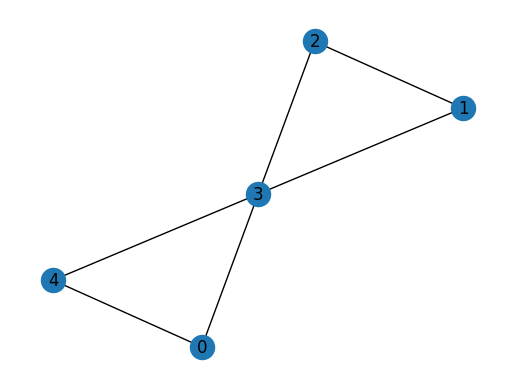

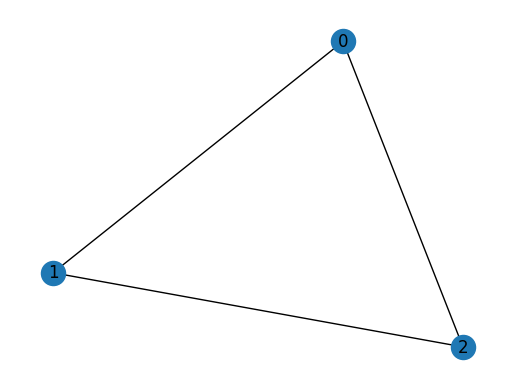

SN_node_attrributes:{1: 50, 2: 20, 3: 30, 4: 10, 0: 10}
SN_edge_attrributes:{(1, 2): 50, (1, 3): 50, (2, 3): 50, (3, 4): 50, (3, 0): 50, (4, 0): 50}
VNR1_node_attrributes:{0: 10, 1: 24, 2: 11}
VNR1_edge_attrributes:{(0, 1): 25, (0, 2): 12, (1, 2): 4}


'\nprint("VNR2_node_attrributes:{}".format(nx.get_node_attributes(VNR2_graph, \'cpu_demand\')))\nprint("VNR2_edge_attrributes:{}".format(nx.get_edge_attributes(VNR2_graph, \'bandwidth_demand\')))\n'

In [5]:
nx.draw_networkx(SN_graph, with_labels=True)
plt.axis('off')
plt.show()

nx.draw_networkx(VNR1_graph, with_labels=True)
plt.axis('off')
plt.show()

"""
nx.draw_networkx(VNR2_graph, with_labels=True)
plt.axis('off')
plt.show()
"""

print("SN_node_attrributes:{}".format(nx.get_node_attributes(SN_graph, 'cpu_capacity')))
print("SN_edge_attrributes:{}".format(nx.get_edge_attributes(SN_graph, 'bandwidth_capacity')))


print("VNR1_node_attrributes:{}".format(nx.get_node_attributes(VNR1_graph, 'cpu_demand')))
print("VNR1_edge_attrributes:{}".format(nx.get_edge_attributes(VNR1_graph, 'bandwidth_demand')))

"""
print("VNR2_node_attrributes:{}".format(nx.get_node_attributes(VNR2_graph, 'cpu_demand')))
print("VNR2_edge_attrributes:{}".format(nx.get_edge_attributes(VNR2_graph, 'bandwidth_demand')))
"""

## Instantiate the CQM


In [6]:
cqm = dimod.ConstrainedQuadraticModel()

In [7]:
VNR1_node_attributes = nx.get_node_attributes(VNR1_graph, 'cpu_demand')
VNR1_edge_attributes = nx.get_edge_attributes(VNR1_graph, 'bandwidth_demand')
# VNR2_node_attributes = nx.get_node_attributes(VNR2_graph, 'cpu_demand')
# VNR2_edge_attributes = nx.get_edge_attributes(VNR2_graph, 'bandwidth_demand')
SN_node_attributes = nx.get_node_attributes(SN_graph, 'cpu_capacity')
SN_edge_attributes = nx.get_edge_attributes(SN_graph, 'bandwidth_capacity')
print(VNR1_node_attributes)

{0: 10, 1: 24, 2: 11}


## Add BINARY Decision Variable $x$ over which the optimization shall be performed for nodes, and $y$ for edges. 
$x^{u}_{ik}$ is a Binary decision variable such that it takes the value 1 if node $n^{s}_{ik}$ of request $vnr_{k}$ is mapped top node $n^{I}_{u}$ of the SN, 0 otherwise. <br>
And, <br>
$y^{uv}_{ijk}$, takes the value 1 is the link $e^{S}_{ijk}$ of requet $VNR_{k}$ is mapped through the physical link $e^{I}_{uv}$ os SN, and 0 otherwise

In [8]:
import cytoolz as tl

In [9]:
VNR_n = len(VNR1_graph.nodes) # number of nodes in VNR1 Graph
SN_n = len(SN_graph.nodes) # number of nodes in SN Graph
x = [[f'x{i}_{j}' for j in range(VNR_n)] for i in range(SN_n)]

cqm.add_variables('BINARY', tl.concat(x))
# Alterantively, you can use the following code to add the variables
# for i in range(SN_n):
#    for j in range(VNR_n):
#        cqm.add_variable('BINARY', x[i][j])



In [10]:
print("x:_{}".format(type(x)))

print("Variables in use:{}".format(cqm.variables))

x:_<class 'list'>
Variables in use:Variables(['x0_0', 'x0_1', 'x0_2', 'x1_0', 'x1_1', 'x1_2', 'x2_0', 'x2_1', 'x2_2', 'x3_0', 'x3_1', 'x3_2', 'x4_0', 'x4_1', 'x4_2'])


In [11]:
"""# cqm.add_variable(dimod.BINARY, 'x') # len(SN_nodes), dimod.BINARY) variable for node mapping 
xs = {vnr_node: Binary(sn_node) for vnr_node in VNR1_graph.nodes() for sn_node in SN_graph.nodes()}
# (wrong) xs = {vnr_node: sn_node for vnr_node, sn_node in zip(VNR1_graph.nodes(), SN_graph.nodes())} --> xs:{0: 0, 1: 1, 2: 2}
xs = {x[sn_node][]}

print("xs:{}".format(xs))
`tl` comes from cytoolz.concat
x = [[f'x{i}_{j}' for j in range(n)] for i in range(n)]
cqm.add_variables(BINARY, tl.concat(x))
"""

'# cqm.add_variable(dimod.BINARY, \'x\') # len(SN_nodes), dimod.BINARY) variable for node mapping \nxs = {vnr_node: Binary(sn_node) for vnr_node in VNR1_graph.nodes() for sn_node in SN_graph.nodes()}\n# (wrong) xs = {vnr_node: sn_node for vnr_node, sn_node in zip(VNR1_graph.nodes(), SN_graph.nodes())} --> xs:{0: 0, 1: 1, 2: 2}\nxs = {x[sn_node][]}\n\nprint("xs:{}".format(xs))\n`tl` comes from cytoolz.concat\nx = [[f\'x{i}_{j}\' for j in range(n)] for i in range(n)]\ncqm.add_variables(BINARY, tl.concat(x))\n'

In [12]:
total_cpu_demand = sum(VNR1_node_attributes[j] * x[i][j] for i in range(SN_n) for j in range(VNR_n))


TypeError: unsupported operand type(s) for +: 'int' and 'str'

## Total usage of resources by the nodes of VNR for using the physical nodes of SN are 


In [13]:
cpu_usage_cost = 0
VNR1_node_attributes[0] * x

[['x0_0', 'x0_1', 'x0_2'],
 ['x1_0', 'x1_1', 'x1_2'],
 ['x2_0', 'x2_1', 'x2_2'],
 ['x3_0', 'x3_1', 'x3_2'],
 ['x4_0', 'x4_1', 'x4_2'],
 ['x0_0', 'x0_1', 'x0_2'],
 ['x1_0', 'x1_1', 'x1_2'],
 ['x2_0', 'x2_1', 'x2_2'],
 ['x3_0', 'x3_1', 'x3_2'],
 ['x4_0', 'x4_1', 'x4_2'],
 ['x0_0', 'x0_1', 'x0_2'],
 ['x1_0', 'x1_1', 'x1_2'],
 ['x2_0', 'x2_1', 'x2_2'],
 ['x3_0', 'x3_1', 'x3_2'],
 ['x4_0', 'x4_1', 'x4_2'],
 ['x0_0', 'x0_1', 'x0_2'],
 ['x1_0', 'x1_1', 'x1_2'],
 ['x2_0', 'x2_1', 'x2_2'],
 ['x3_0', 'x3_1', 'x3_2'],
 ['x4_0', 'x4_1', 'x4_2'],
 ['x0_0', 'x0_1', 'x0_2'],
 ['x1_0', 'x1_1', 'x1_2'],
 ['x2_0', 'x2_1', 'x2_2'],
 ['x3_0', 'x3_1', 'x3_2'],
 ['x4_0', 'x4_1', 'x4_2'],
 ['x0_0', 'x0_1', 'x0_2'],
 ['x1_0', 'x1_1', 'x1_2'],
 ['x2_0', 'x2_1', 'x2_2'],
 ['x3_0', 'x3_1', 'x3_2'],
 ['x4_0', 'x4_1', 'x4_2'],
 ['x0_0', 'x0_1', 'x0_2'],
 ['x1_0', 'x1_1', 'x1_2'],
 ['x2_0', 'x2_1', 'x2_2'],
 ['x3_0', 'x3_1', 'x3_2'],
 ['x4_0', 'x4_1', 'x4_2'],
 ['x0_0', 'x0_1', 'x0_2'],
 ['x1_0', 'x1_1', 'x1_2'],
 